# Pymaceuticals Inc.
---

### Business Context

Pymaceuticals, Inc. is a new pharmaceutial company specializing in anti-cancer medications. It began screening for potential treatments for squamous cell carcinoma (SCC).

### Objective

The goal is to compare the performance of Pymaceuticals' drug of interest, Capomulin, against the other treatment regimens. The analysis looks at a recent animal study of 249 mice identified with SCC tumors that received treatment with a range of drug regimens over the course of 45 days.

### Recommendations

Ramicane and Capomulin were the only two drug regimen's that had positive results with a -22% and -20% respective reduction in average tumor volume when compared to timepoints. However, more testing is needed with a larger test population due to each drug regimen having a test population of 25 mice.

Ramicane had slightly better results when compared to Capomulin with a 2% greater reduction in average tumor volume from the first timepoint to the last timepoint suggesting a longer study is needed.

### Analysis

Ramicane and Capomulin were the only two drug regimen's that had positive results with the reduction in average tumor volume looking at the first and last timepoints. This is supported by a negative correlation between the average tumor volume and timepoint.

Ramicane had a -22% reduction in average tumor volume and a -.63 correlation when compared to timepoints, and Capomulin had a -20% reduction in average tumor volume and a -.58 correlation when compared to timepoints.

Ramicand and Capomulin had an .81 and .84 positive correlation between average tumor volume and weight.  They were the only treatment regimens with a positive correlation in average tumor volume and weight.

Average number of mice per drug regimen was 25 with Stelasyn having 24 due to the removal of an outlier.

Mix between Male and Female was almost even at 51% Male and 49% female.





 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
combine_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_of_mice = combine_df['Mouse ID'].nunique()
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = combine_df.loc[combine_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep='last') == True,['Mouse ID']].drop_duplicates()
duplicate_mouse_id

,Mouse ID
107,g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combine_g989_df = combine_df.loc[combine_df['Mouse ID'] == 'g989', :]
combine_g989_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combine_clean_df = combine_df.drop(combine_df[(combine_df['Mouse ID'] == 'g989')].index)
combine_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = combine_clean_df['Mouse ID'].nunique()
number_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
combine_clean_gb = combine_clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': 
                                    [np.mean, np.median, np.var, np.std, st.sem]})
combine_clean_gb.columns = combine_clean_gb.columns.droplevel(0)
combine_clean_gb.rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Tumor Volume Variance',
                                     'std': 'Tumor Volume Std. Dev.', 'sem': 'Tumor Volume Std. Err.'}, inplace=True)
combine_clean_gb

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
combine_clean_single_line_df = combine_clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': 
                                                    [np.mean, np.median, np.var, np.std, st.sem]})
combine_clean_single_line_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

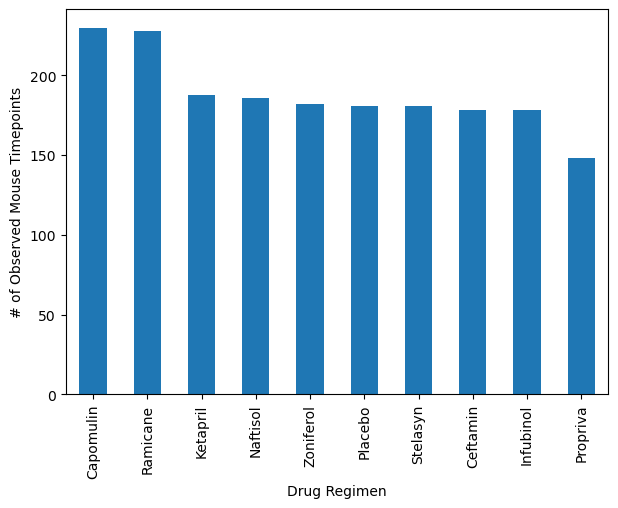

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
combine_clean_bar = combine_clean_df.groupby('Drug Regimen', as_index=False)['Mouse ID'].count()
combine_clean_bar.sort_values(by='Mouse ID', ascending=False, inplace=True)
combine_clean_bar = combine_clean_bar.set_index('Drug Regimen')
# combine_clean_bar.head()
combine_clean_bar.plot(kind="bar", figsize=(7,5), ylabel='# of Observed Mouse Timepoints', legend=False)
plt.show()
plt.tight_layout()

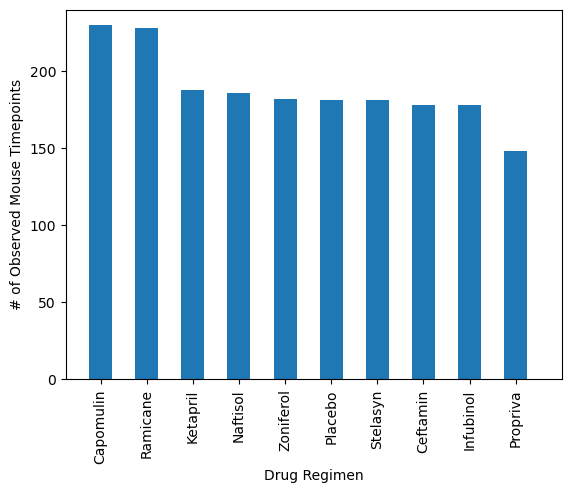

<Figure size 640x480 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
combine_clean_bar = combine_clean_df.groupby('Drug Regimen', as_index=False)['Mouse ID'].count()
combine_clean_bar.sort_values(by='Mouse ID', ascending=False, inplace=True)
x_axis = np.arange(len(combine_clean_bar))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, combine_clean_bar['Mouse ID'], width=.5, align="center")
plt.xticks(tick_locations, combine_clean_bar['Drug Regimen'], rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(combine_clean_bar['Mouse ID'])+10)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()
plt.tight_layout()

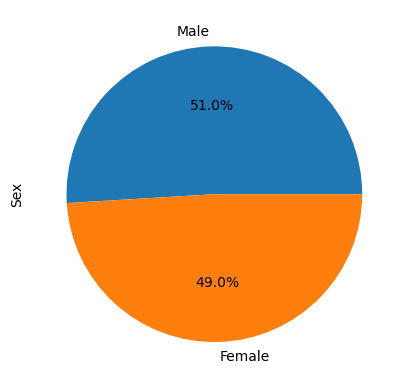

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female = combine_clean_df.groupby(['Sex'])['Sex'].count()
male_vs_female_sort = male_vs_female.sort_values(ascending=False)
male_vs_female_sort.plot(kind='pie', y='Sex', autopct='%1.1f%%')

plt.show()


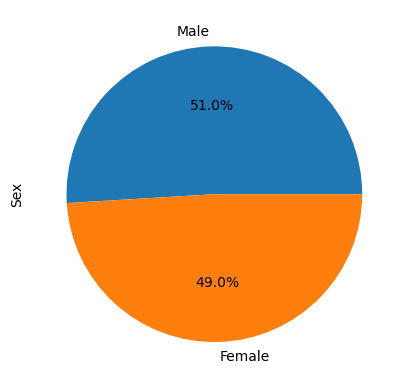

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_vs_female = combine_clean_df.groupby('Sex', as_index=False)['Mouse ID'].count()
male_vs_female_sort = male_vs_female.sort_values('Mouse ID', ascending=False)
labels = male_vs_female_sort['Sex'].to_numpy()
Sex = male_vs_female_sort['Mouse ID'].to_numpy()
plt.pie(Sex, labels=labels, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_regimen = combine_clean_df.loc[(combine_clean_df['Drug Regimen'] == 'Capomulin') |
                                    (combine_clean_df['Drug Regimen'] == 'Ramicane') |
                                    (combine_clean_df['Drug Regimen'] == 'Infubinol') |
                                    (combine_clean_df['Drug Regimen'] == 'Ceftamin') ]
tumor_volume = drug_regimen.groupby(['Drug Regimen', 'Mouse ID'], as_index=False)['Tumor Volume (mm3)'].agg('last')
tumor_volume.rename(columns={'Tumor Volume (mm3)':'Last Tumor Volume'}, inplace=True)

# Start by getting the last (greatest) timepoint for each mouse
time_point = drug_regimen.groupby(['Drug Regimen', 'Mouse ID'], as_index=False)['Timepoint'].agg('last')
time_point.rename(columns={'Timepoint':'Last Timepoint'}, inplace=True)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_last_timepoint = pd.merge(tumor_volume, time_point,on=['Drug Regimen', 'Mouse ID'], how='outer')


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = drug_regimen.groupby('Drug Regimen')['Drug Regimen'].agg('first').to_list()

# Create empty list to fill with tumor vol data (for plotting)
Capomulin_tumor_vol_data = []
Ceftamin_tumor_vol_data = []
Infubinol_tumor_vol_data = []
Ramicane_tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    # Locate the rows which contain mice on each drug and get the tumor volumes
for record in tumor_last_timepoint.index:
    if tumor_last_timepoint.loc[record, 'Drug Regimen']  == 'Capomulin':
        Capomulin_tumor_vol_data.append(tumor_last_timepoint.loc[record,'Last Tumor Volume'])
    elif tumor_last_timepoint.loc[record, 'Drug Regimen']  == 'Ceftamin':
        Ceftamin_tumor_vol_data.append(tumor_last_timepoint.loc[record,'Last Tumor Volume'])
    elif tumor_last_timepoint.loc[record, 'Drug Regimen']  == 'Infubinol':
        Infubinol_tumor_vol_data.append(tumor_last_timepoint.loc[record,'Last Tumor Volume'])
    elif tumor_last_timepoint.loc[record, 'Drug Regimen']  == 'Ramicane':
        Ramicane_tumor_vol_data.append(tumor_last_timepoint.loc[record,'Last Tumor Volume'])
    
    # add subset 

    # Determine outliers using upper and lower bounds
for drug in treatments:
    temp_df = tumor_last_timepoint.loc[tumor_last_timepoint['Drug Regimen'] == drug,:]
    quartiles = temp_df['Last Tumor Volume'].quantile([.25,.5,.75])
    vol_lowerq = quartiles.loc[.25]
    vol_upperq = quartiles.loc[.75]
    iqr = vol_upperq-vol_lowerq
    vol_lower_bound = vol_lowerq - (1.5*iqr)
    vol_upper_bound = vol_upperq + (1.5*iqr)
    vol_outliers = temp_df.loc[(temp_df['Last Tumor Volume'] > vol_upper_bound) | (temp_df['Last Tumor Volume'] < vol_lower_bound)]
    print(f"{drug}'s potential outliers: {vol_outliers.loc[:,'Last Tumor Volume']}")

Capomulin's potential outliers: Series([], Name: Last Tumor Volume, dtype: float64)
Ceftamin's potential outliers: Series([], Name: Last Tumor Volume, dtype: float64)
Infubinol's potential outliers: 55    36.321346
Name: Last Tumor Volume, dtype: float64
Ramicane's potential outliers: Series([], Name: Last Tumor Volume, dtype: float64)


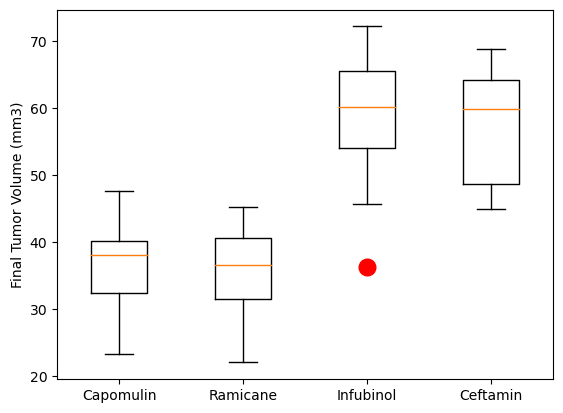

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data = [Capomulin_tumor_vol_data, Ramicane_tumor_vol_data, Infubinol_tumor_vol_data, Ceftamin_tumor_vol_data]
fig1, ax1= plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
flierprops = dict(marker='o', markerfacecolor='r', markersize=12, linestyle='solid', markeredgecolor='k')
ax1.boxplot(data, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], sym='r', flierprops=flierprops)
plt.show()

## Line and Scatter Plots

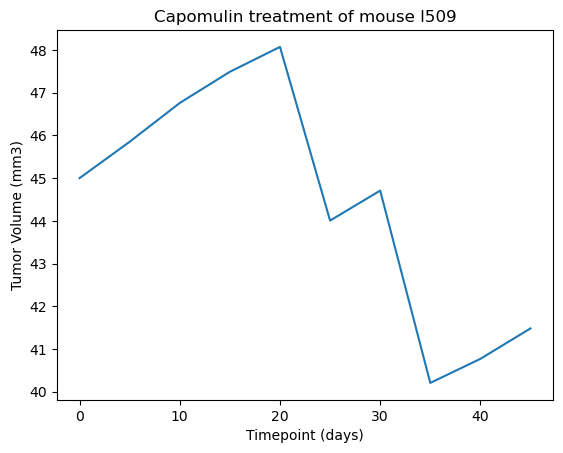

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
volume_vs_timepoint = combine_clean_df.loc[(combine_clean_df['Mouse ID'] == 'l509') & (combine_clean_df['Drug Regimen'] == 'Capomulin'),
                                           ['Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)', 'Timepoint']]
volume_vs_timepoint.sort_values('Timepoint', inplace=True)
title_drug = volume_vs_timepoint.iloc[0,0]
title_mouse_id = volume_vs_timepoint.iloc[0,1]
volume_vs_timepoint.plot.line('Timepoint', 'Tumor Volume (mm3)', title=f'{title_drug} treatment of mouse {title_mouse_id}', legend=False)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

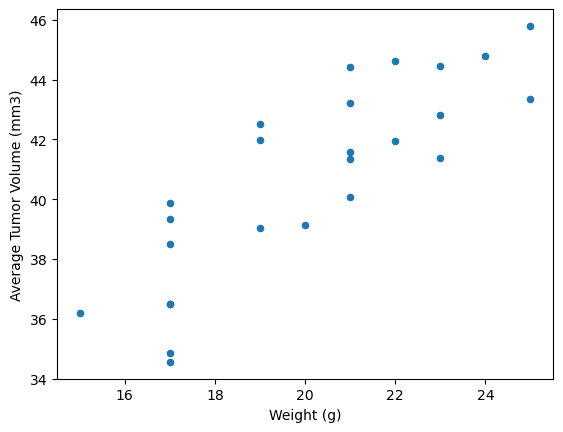

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_regimen = combine_clean_df[['Mouse ID', 'Drug Regimen', 'Weight (g)']].loc[combine_clean_df['Drug Regimen'] == 'Capomulin']
capomulin_regimen.drop_duplicates(inplace=True)
capomulin_mean = combine_clean_df.groupby(combine_clean_df['Mouse ID'].loc[combine_clean_df['Drug Regimen'] 
                                                    == 'Capomulin']).agg({'Tumor Volume (mm3)': np.mean})
capomulin_merge = pd.merge(capomulin_regimen, capomulin_mean, on='Mouse ID', how='outer')
capomulin_merge.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', ylabel='Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


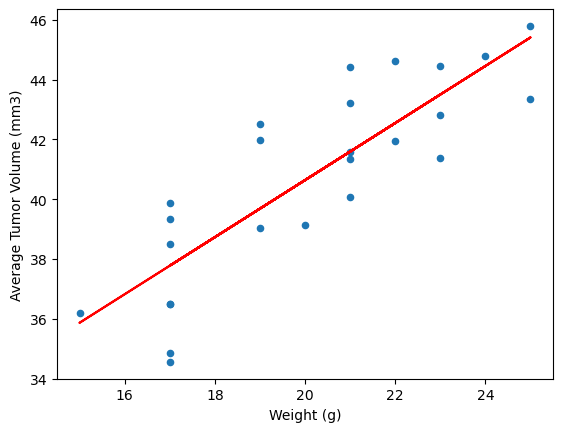

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_regimen = combine_clean_df[['Mouse ID', 'Drug Regimen', 'Weight (g)']].loc[combine_clean_df['Drug Regimen'] == 'Capomulin']
capomulin_regimen.drop_duplicates(inplace=True)
capomulin_mean = combine_clean_df.groupby(combine_clean_df['Mouse ID'].loc[combine_clean_df['Drug Regimen'] 
                                            == 'Capomulin']).agg({'Tumor Volume (mm3)': np.mean})
capomulin_merge = pd.merge(capomulin_regimen, capomulin_mean, on='Mouse ID', how='outer')
capomulin_merge.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', ylabel='Average Tumor Volume (mm3)')


mouse_weight = np.array(capomulin_merge['Weight (g)'])
tumor_volume = np.array(capomulin_merge['Tumor Volume (mm3)'])
res = st.linregress(mouse_weight, tumor_volume)
print(f'The correlation between mouse weight and the average tumor volume is {res.rvalue:0.2f}')
plt.plot(mouse_weight, res.intercept + res.slope*mouse_weight, 'r')
plt.show()

In [19]:
# -----------------------------------
# ---Additional Analysis-------------
# -----------------------------------
# Calculate Tumor Volume percent change from first Timepoint to last Timepoint

# Get average Tumor Volume by Drug Regimen and Timepoint
tumor_volume_mean = combine_clean_df.groupby(['Drug Regimen','Timepoint'], as_index=False).agg({'Tumor Volume (mm3)': np.mean})
tumor_volume_mean.sort_values(['Drug Regimen','Timepoint'], inplace=True)

# Limit rows to first and last Timepoint
percent_chg = tumor_volume_mean[(tumor_volume_mean['Timepoint'] == 0) | (tumor_volume_mean['Timepoint'] == 45)].copy()

# Calculate Tumor Volume percent change from first to last Timepoiont
percent_chg['Tumor Volume Percent Change'] = percent_chg.groupby('Drug Regimen')['Tumor Volume (mm3)'].pct_change()*100

# Display Tumor Volume percent change
percent_chg_final = percent_chg.loc[(percent_chg['Timepoint'] == 45), ['Drug Regimen', 'Tumor Volume Percent Change']].copy()
percent_chg_final.sort_values('Tumor Volume Percent Change', inplace=True)
print(percent_chg_final)


   Drug Regimen  Tumor Volume Percent Change
79     Ramicane                   -22.320900
9     Capomulin                   -19.475303
19     Ceftamin                    42.516492
29    Infubinol                    46.123472
99    Zoniferol                    46.579751
69     Propriva                    47.241175
59      Placebo                    51.297960
89     Stelasyn                    52.085134
49     Naftisol                    53.923347
39     Ketapril                    57.028795


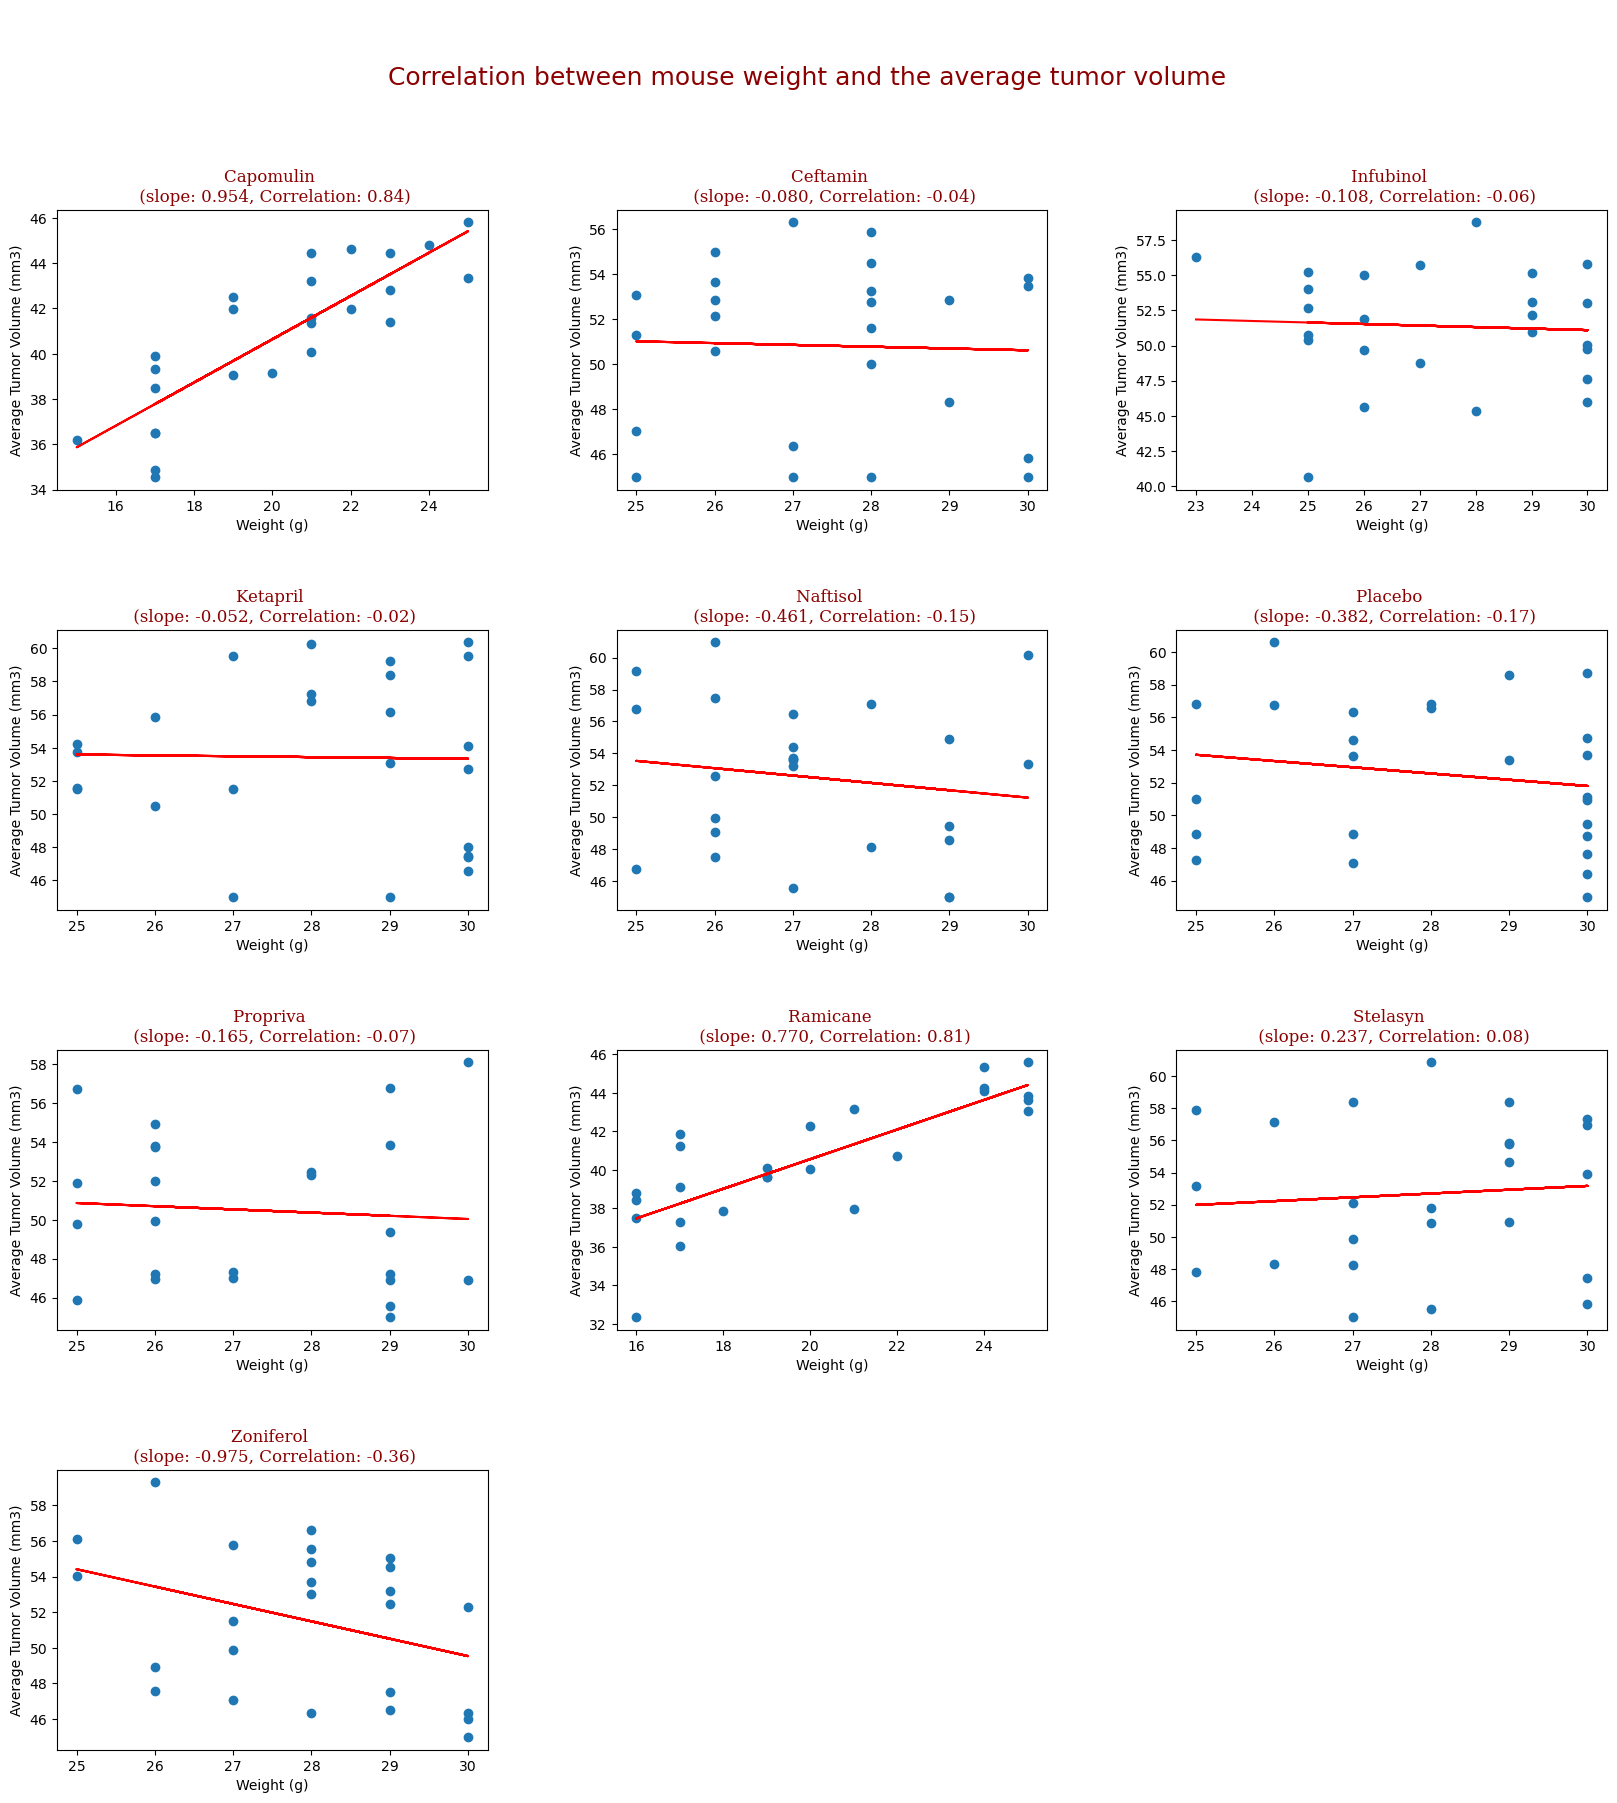

In [184]:
# -----------------------------------
# ---Additional Analysis-------------
# -----------------------------------
# Plot correlation between Tumor Volume and Mouse Weight for each Drug Regimen


tumor_vol_pct_chng = combine_clean_df.groupby(['Mouse ID', 'Drug Regimen','Weight (g)'], as_index=False).agg({'Tumor Volume (mm3)': np.mean})
tumor_vol_pct_chng.sort_values(['Mouse ID', 'Drug Regimen','Weight (g)'], inplace=True)

treatments = combine_clean_df.groupby('Drug Regimen')['Drug Regimen'].agg('first').to_list()
font = {'family': 'serif', 'color': 'darkred', 'weight': 'normal', 'size': 12}
fig = plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=.3, hspace=.5)
fig.suptitle('\n\nCorrelation between mouse weight and the average tumor volume', fontsize=18, ha='center', color='darkred')

for n, treatment in enumerate(treatments):
    ax = fig.add_subplot(4, 3, n + 1)
    x = tumor_vol_pct_chng.loc[(tumor_vol_pct_chng['Drug Regimen'] == treatment), 'Weight (g)']
    y = tumor_vol_pct_chng.loc[(tumor_vol_pct_chng['Drug Regimen'] == treatment), 'Tumor Volume (mm3)']
    ax.scatter(x, y, label=treatment, )
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), 'r')
    r, p = st.pearsonr(x, y)
    ax.set_xlabel('Weight (g)')
    ax.set_ylabel('Average Tumor Volume (mm3)')
    ax.set_title(f'{treatment} \n (slope: {z[0]:.3f}, Correlation: {r:.2f})', fontdict=font)

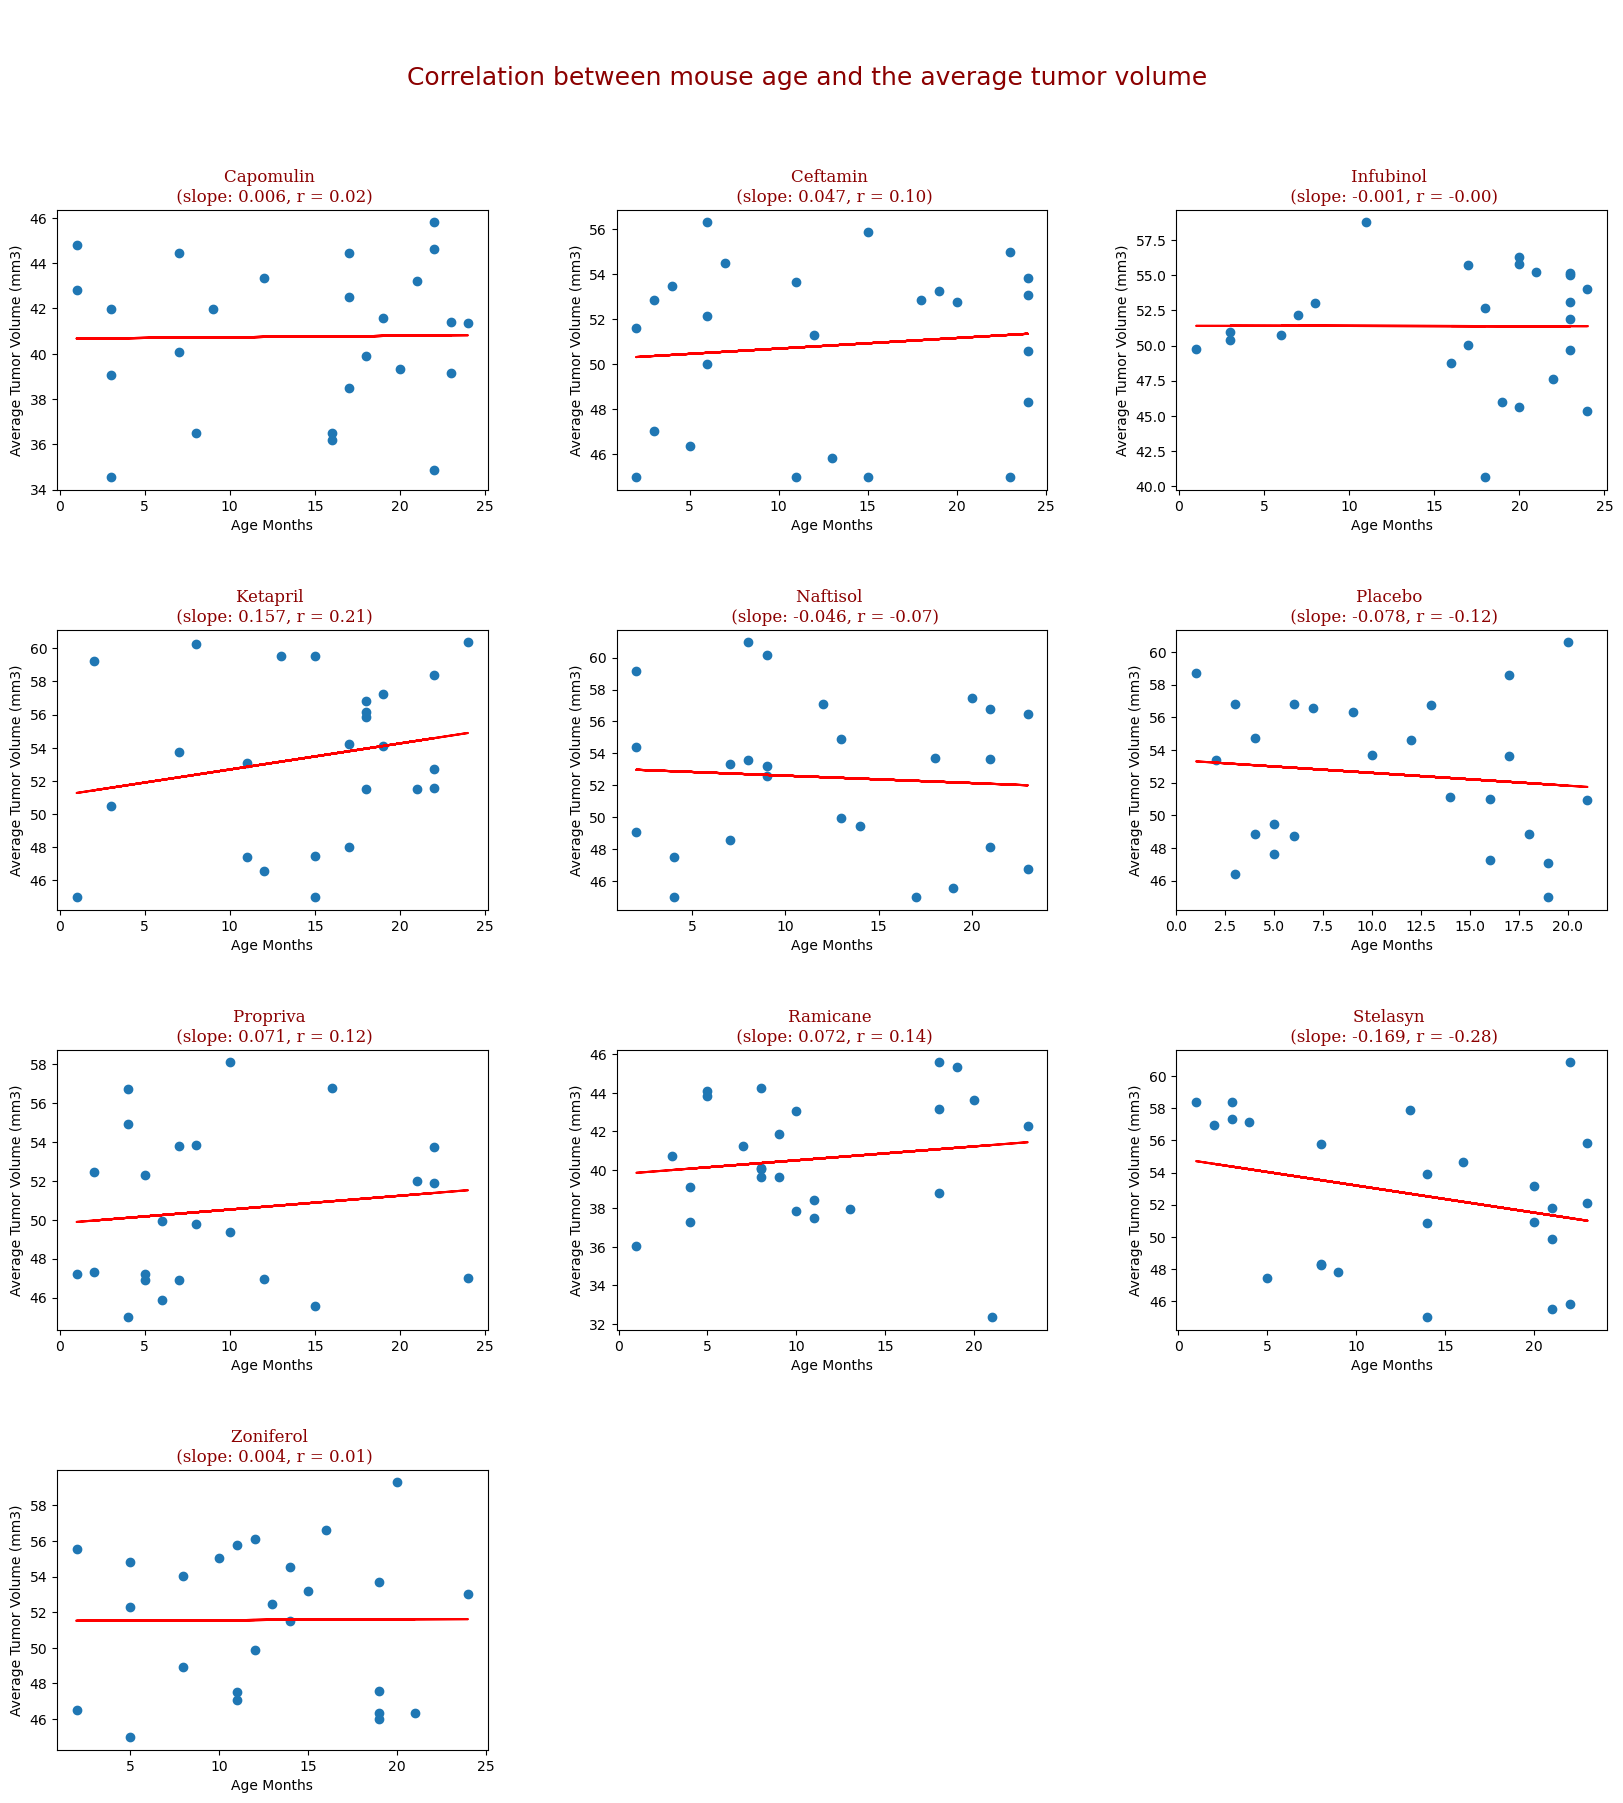

In [185]:
# -----------------------------------
# ---Additional Analysis-------------
# -----------------------------------
# Plot correlation between Tumor Volume and Mouse Age for each Drug Regimen


tumor_vol_pct_chng = combine_clean_df.groupby(['Mouse ID', 'Drug Regimen', 'Age_months'], as_index=False).agg({'Tumor Volume (mm3)': np.mean})
tumor_vol_pct_chng.sort_values(['Mouse ID', 'Drug Regimen','Age_months'], inplace=True)

treatments = combine_clean_df.groupby('Drug Regimen')['Drug Regimen'].agg('first').to_list()

fig = plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=.3, hspace=.5)
# fig.suptitle('\n\nCorrelation between mouse age and the average tumor volume')
fig.suptitle(t='\n\nCorrelation between mouse age and the average tumor volume', fontsize=18, ha='center', color='darkred')
font = {'family': 'serif', 'color': 'darkred', 'weight': 'normal', 'size': 12}
for n, treatment in enumerate(treatments):
    ax = fig.add_subplot(4, 3, n + 1)
    x = tumor_vol_pct_chng.loc[(tumor_vol_pct_chng['Drug Regimen'] == treatment), 'Age_months']
    y = tumor_vol_pct_chng.loc[(tumor_vol_pct_chng['Drug Regimen'] == treatment), 'Tumor Volume (mm3)']
    ax.scatter(x, y, label=treatment, )
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), 'r')
    r, p = st.pearsonr(x, y)
    ax.set_xlabel('Age Months')
    ax.set_ylabel('Average Tumor Volume (mm3)')
    ax.set_title(f'{treatment} \n (slope: {z[0]:.3f}, r = {r:.2f})', fontdict=font)

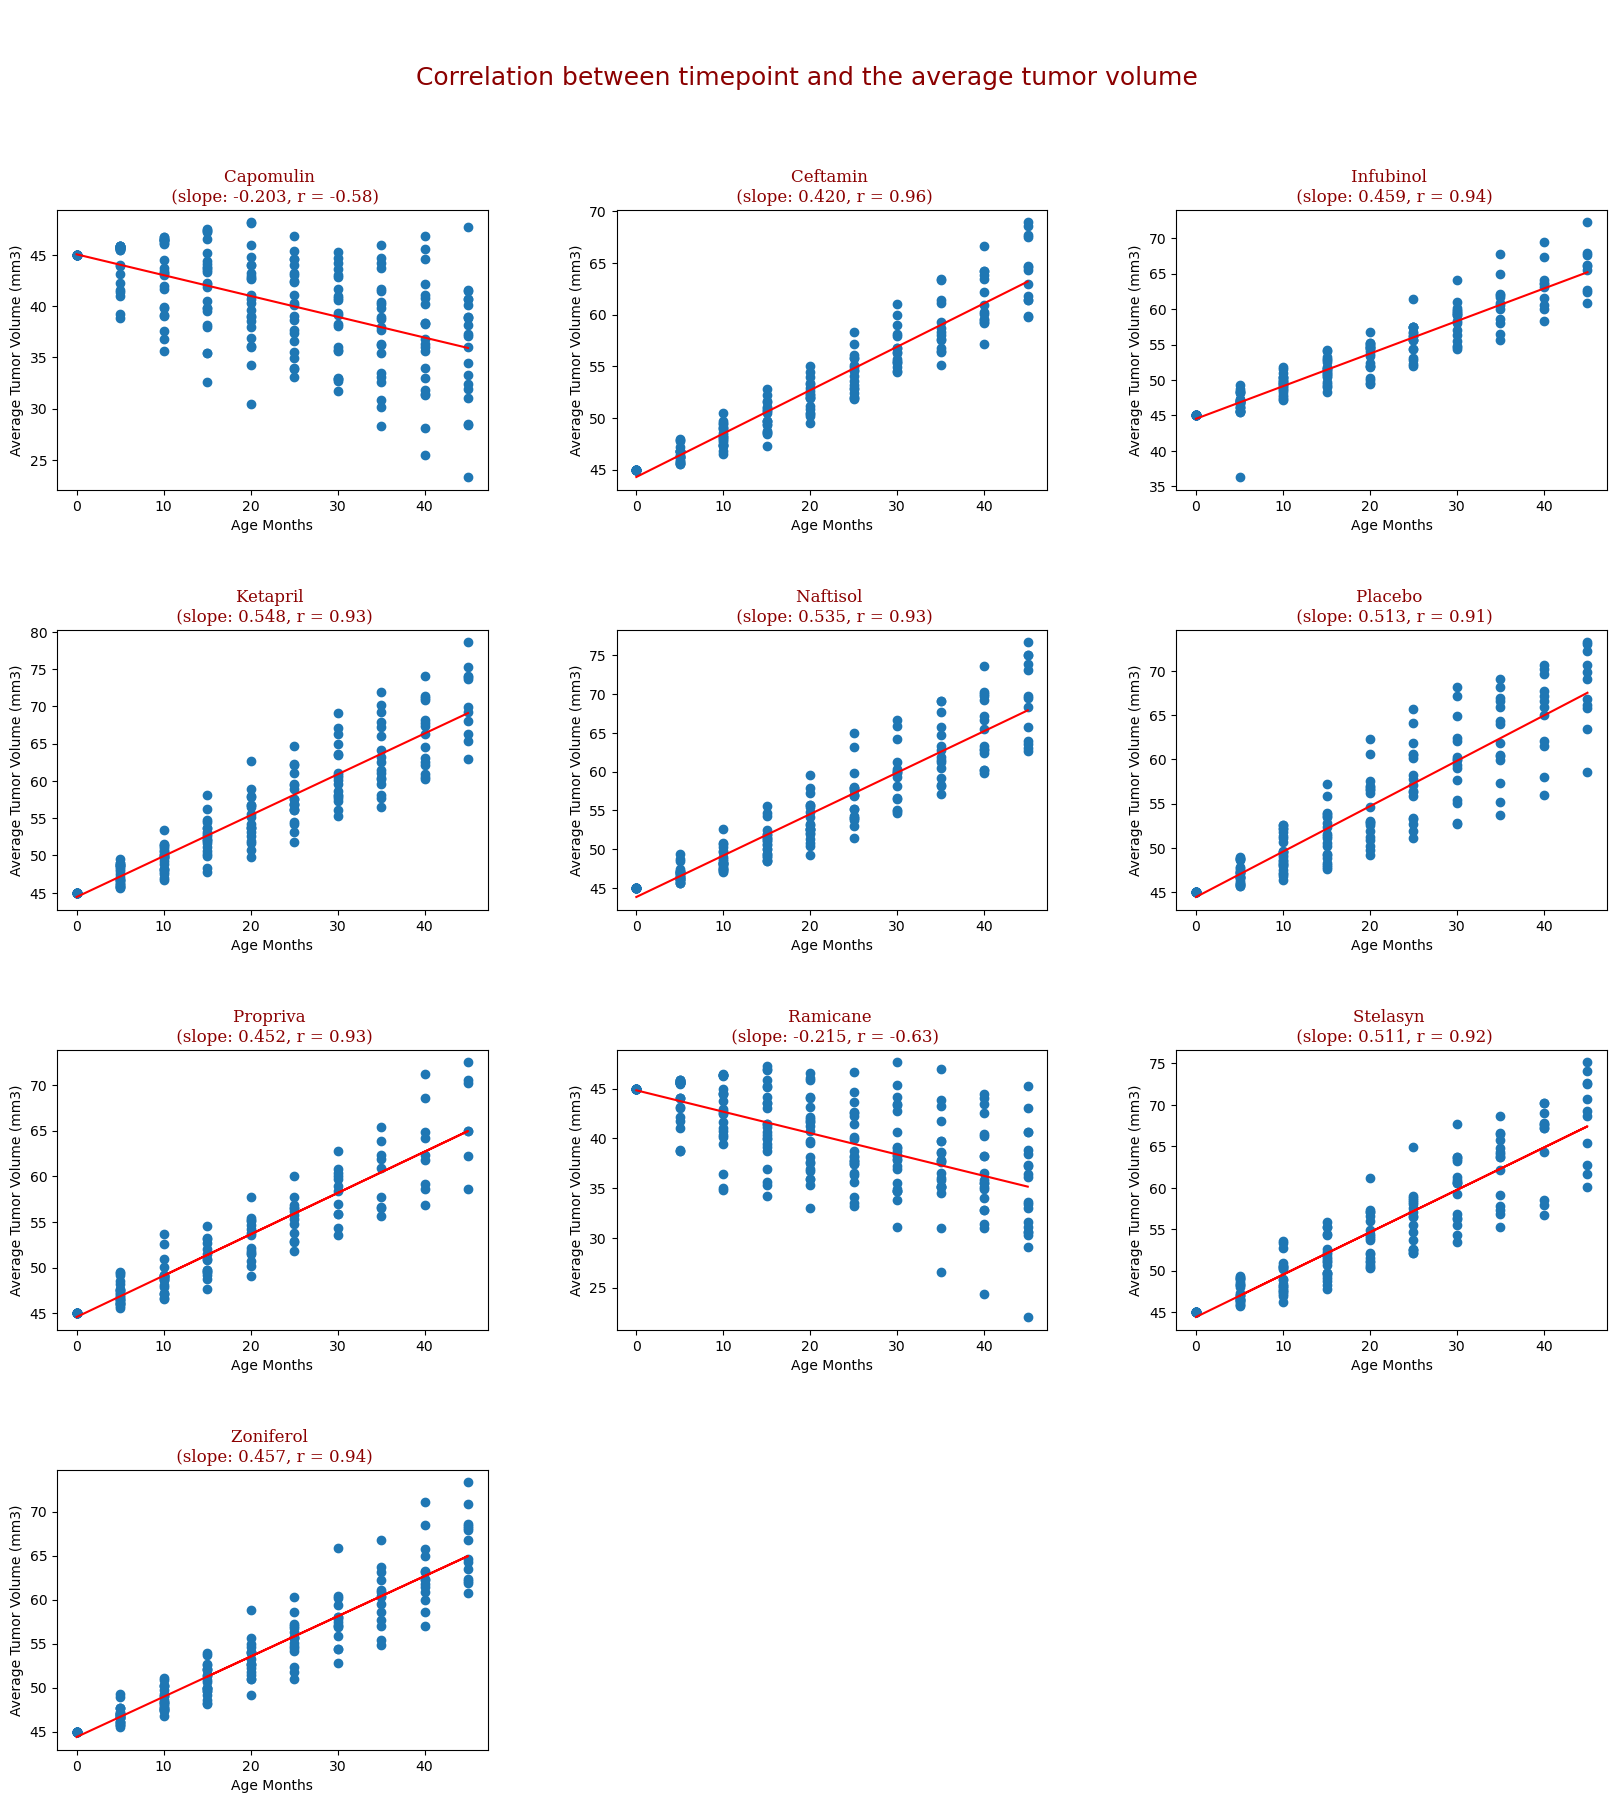

In [186]:
# -----------------------------------
# ---Additional Analysis-------------
# -----------------------------------
# Plot correlation between Tumor Volume and Timepoint for each Drug Regimen


tumor_vol_pct_chng = combine_clean_df.groupby(['Mouse ID', 'Drug Regimen', 'Timepoint'], as_index=False).agg({'Tumor Volume (mm3)': np.mean})
tumor_vol_pct_chng.sort_values(['Mouse ID', 'Drug Regimen','Timepoint'], inplace=True)

treatments = combine_clean_df.groupby('Drug Regimen')['Drug Regimen'].agg('first').to_list()

fig = plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=.3, hspace=.5)
# fig.suptitle('\n\nCorrelation between mouse age and the average tumor volume')
fig.suptitle(t='\n\nCorrelation between timepoint and the average tumor volume', fontsize=18, ha='center', color='darkred')
font = {'family': 'serif', 'color': 'darkred', 'weight': 'normal', 'size': 12}
for n, treatment in enumerate(treatments):
    ax = fig.add_subplot(4, 3, n + 1)
    x = tumor_vol_pct_chng.loc[(tumor_vol_pct_chng['Drug Regimen'] == treatment), 'Timepoint']
    y = tumor_vol_pct_chng.loc[(tumor_vol_pct_chng['Drug Regimen'] == treatment), 'Tumor Volume (mm3)']
    ax.scatter(x, y, label=treatment, )
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), 'r')
    r, p = st.pearsonr(x, y)
    ax.set_xlabel('Age Months')
    ax.set_ylabel('Average Tumor Volume (mm3)')
    ax.set_title(f'{treatment} \n (slope: {z[0]:.3f}, r = {r:.2f})', fontdict=font)